<a href="https://colab.research.google.com/github/krimoe/Machine-learning/blob/main/kidney_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Partie 1 : apprentissage supervisé
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [ ]:
#charging dataset
data = pd.read_csv('/content/kidney_disease.csv') 
data.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#rename columns
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc ':'globules rouges','pc':'cellule de pus','pcc':'amas de cellules de pus','ba':'bactéries','bgr':'glycémie aléatoire','bu':'urée sanguine','sc':'créatinine sérique','sod':'sodium','pot':'potassium','hemo':'hémoglobine','pcv':'hématocrite','wc' :'nombre de globules blancs','rc':'nombre de globules rouges','htn':'hypertension','dm':'diabète sucré','cad':'maladie coronarienne','appet': 'appétit','pe':'œdème pédieux','ane':'anémie','classification':'classe'},inplace=True)
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,rbc,cellule de pus,amas de cellules de pus,bactéries,...,hématocrite,nombre de globules blancs,nombre de globules rouges,hypertension,diabète sucré,maladie coronarienne,appétit,œdème pédieux,anémie,classe
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Preprocessing
data.drop('id',axis=1,inplace=True)

In [ ]:
data.shape

(400, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        391 non-null    float64
 1   blood_pressure             388 non-null    float64
 2   specific gravity           353 non-null    float64
 3   albumin                    354 non-null    float64
 4   sugar                      351 non-null    float64
 5   rbc                        248 non-null    object 
 6   cellule de pus             335 non-null    object 
 7   amas de cellules de pus    396 non-null    object 
 8   bactéries                  396 non-null    object 
 9   glycémie aléatoire         356 non-null    float64
 10  urée sanguine              381 non-null    float64
 11  créatinine sérique         383 non-null    float64
 12  sodium                     313 non-null    float64
 13  potassium                  312 non-null    float64

In [ ]:
data.isnull().sum()

age                            9
blood_pressure                12
specific gravity              47
albumin                       46
sugar                         49
rbc                          152
cellule de pus                65
amas de cellules de pus        4
bactéries                      4
glycémie aléatoire            44
urée sanguine                 19
créatinine sérique            17
sodium                        87
potassium                     88
hémoglobine                   52
hématocrite                   70
nombre de globules blancs    105
nombre de globules rouges    130
hypertension                   2
diabète sucré                  2
maladie coronarienne           2
appétit                        1
œdème pédieux                  1
anémie                         1
classe                         0
dtype: int64

compte tenu de la taille de la data, nous ne pouvons pas nous permettre de supprimer des observations (instances), nous allons donc remplacer les valeurs manquantes et traiter les éventuelles anomalies.

In [ ]:
data.columns

Index(['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar', 'rbc',
       'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges', 'hypertension', 'diabète sucré',
       'maladie coronarienne', 'appétit', 'œdème pédieux', 'anémie', 'classe'],
      dtype='object')

In [ ]:
data.describe()

,age,blood_pressure,specific gravity,albumin,sugar,glycémie aléatoire,urée sanguine,créatinine sérique,sodium,potassium,hémoglobine
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
data.duplicated() #recherche d'instances dupliquées (ici pas d'instances dupliquées)

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
float_columns = data.select_dtypes(include=['float64']).columns # colonnes dtype float
float_columns

Index(['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine'],
      dtype='object')

les colonnes ['hématocrite', 'nombre de globules blancs', 'nombre de globules rouges'] sont aussi de dtype numérique avec quelques anomalies, on les traitera avec les float_columns



In [ ]:
data['hématocrite'].mode()

0    41
1    52
dtype: object

In [ ]:
data['nombre de globules rouges'].mode()

0    5.2
dtype: object

In [ ]:
data['nombre de globules blancs'].mode()

0    9800
dtype: object

In [ ]:
#Remplacement des valeurs manquantes pour les float_columns et les colonnes ['hématocrite', 'nombre de globules blancs', 'nombre de globules rouges'] 
data['age'].fillna(data['age'].mean() , inplace = True)
data['blood_pressure'].fillna(data['blood_pressure'].mean() , inplace = True)
data['specific gravity'].fillna(data['specific gravity'].mean() , inplace = True)
data['albumin'].fillna(data['albumin'].mean() , inplace = True)
data['sugar'].fillna(data['sugar'].mean() , inplace = True)
data['glycémie aléatoire'].fillna(data['glycémie aléatoire'].mean() , inplace = True)
data['urée sanguine'].fillna(data['urée sanguine'].mean() , inplace = True)
data['créatinine sérique'].fillna(data['créatinine sérique'].mean() , inplace = True)
data['sodium'].fillna(data['sodium'].mean() , inplace = True)
data['potassium'].fillna(data['potassium'].mean() , inplace = True)
data['hémoglobine'].fillna(data['hémoglobine'].mean() , inplace = True)
data['hématocrite'].fillna(41 , inplace = True) #fillna with mode 
data['nombre de globules blancs'].fillna(9800, inplace = True) #fillna with mode
data['nombre de globules rouges'].fillna(5.2 , inplace = True) #fillna with mode

In [ ]:
data.info() # pour vérifier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        400 non-null    float64
 1   blood_pressure             400 non-null    float64
 2   specific gravity           400 non-null    float64
 3   albumin                    400 non-null    float64
 4   sugar                      400 non-null    float64
 5   rbc                        248 non-null    object 
 6   cellule de pus             335 non-null    object 
 7   amas de cellules de pus    396 non-null    object 
 8   bactéries                  396 non-null    object 
 9   glycémie aléatoire         400 non-null    float64
 10  urée sanguine              400 non-null    float64
 11  créatinine sérique         400 non-null    float64
 12  sodium                     400 non-null    float64
 13  potassium                  400 non-null    float64

In [ ]:
# traitement des anomalies des colonnes ['hématocrite', 'nombre de globules blancs', 'nombre de globules rouges'] 
data['hématocrite'].value_counts()

41      70
52      21
41      21
48      19
44      19
40      16
43      14
42      13
45      13
36      12
33      12
28      12
50      12
32      12
37      11
34      11
46       9
30       9
29       9
35       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
22       3
27       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
\t?      1
16       1
14       1
Name: hématocrite, dtype: int64

In [ ]:
data['hématocrite']= data['hématocrite'].replace('\t43','43')
data['hématocrite']= data['hématocrite'].replace('\t?','41') #replace with mode

In [ ]:
data['hématocrite'].value_counts()

41    70
41    22
52    21
48    19
44    19
40    16
43    15
42    13
45    13
28    12
50    12
33    12
36    12
32    12
34    11
37    11
30     9
29     9
35     9
46     9
31     8
24     7
39     7
26     6
38     5
53     4
49     4
51     4
47     4
54     4
25     3
22     3
27     3
19     2
23     2
15     1
21     1
20     1
17     1
9      1
14     1
16     1
18     1
Name: hématocrite, dtype: int64

In [ ]:
data['hématocrite']=data['hématocrite'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        400 non-null    float64
 1   blood_pressure             400 non-null    float64
 2   specific gravity           400 non-null    float64
 3   albumin                    400 non-null    float64
 4   sugar                      400 non-null    float64
 5   rbc                        248 non-null    object 
 6   cellule de pus             335 non-null    object 
 7   amas de cellules de pus    396 non-null    object 
 8   bactéries                  396 non-null    object 
 9   glycémie aléatoire         400 non-null    float64
 10  urée sanguine              400 non-null    float64
 11  créatinine sérique         400 non-null    float64
 12  sodium                     400 non-null    float64
 13  potassium                  400 non-null    float64

In [ ]:
data['nombre de globules blancs'].value_counts()

9800     105
9800      11
6700      10
9600       9
7200       9
        ... 
11200      1
19100      1
\t?        1
12300      1
16700      1
Name: nombre de globules blancs, Length: 93, dtype: int64

In [ ]:
data['nombre de globules blancs']= data['nombre de globules blancs'].replace('\t?','9800') #replace with mode
data['nombre de globules blancs']=data['nombre de globules blancs'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        400 non-null    float64
 1   blood_pressure             400 non-null    float64
 2   specific gravity           400 non-null    float64
 3   albumin                    400 non-null    float64
 4   sugar                      400 non-null    float64
 5   rbc                        248 non-null    object 
 6   cellule de pus             335 non-null    object 
 7   amas de cellules de pus    396 non-null    object 
 8   bactéries                  396 non-null    object 
 9   glycémie aléatoire         400 non-null    float64
 10  urée sanguine              400 non-null    float64
 11  créatinine sérique         400 non-null    float64
 12  sodium                     400 non-null    float64
 13  potassium                  400 non-null    float64

In [ ]:
data['nombre de globules rouges'].value_counts()

5.2    130
5.2     18
4.5     16
4.9     14
4.7     11
3.9     10
4.8     10
4.6      9
3.4      9
5.9      8
5.5      8
6.1      8
5.0      8
3.7      8
5.3      7
5.8      7
5.4      7
3.8      7
5.6      6
4.3      6
4.2      6
3.2      5
4.4      5
5.7      5
6.4      5
5.1      5
6.2      5
6.5      5
4.1      5
3.6      4
6.3      4
6.0      4
4.0      3
3.3      3
4        3
3.5      3
2.9      2
3.1      2
2.6      2
2.1      2
2.5      2
2.8      2
3.0      2
2.7      2
5        2
2.3      1
\t?      1
2.4      1
3        1
8.0      1
Name: nombre de globules rouges, dtype: int64

In [ ]:
data['nombre de globules rouges']= data['nombre de globules rouges'].replace('\t?','5.2') #replace with mode
data['nombre de globules rouges']=data['nombre de globules rouges'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        400 non-null    float64
 1   blood_pressure             400 non-null    float64
 2   specific gravity           400 non-null    float64
 3   albumin                    400 non-null    float64
 4   sugar                      400 non-null    float64
 5   rbc                        248 non-null    object 
 6   cellule de pus             335 non-null    object 
 7   amas de cellules de pus    396 non-null    object 
 8   bactéries                  396 non-null    object 
 9   glycémie aléatoire         400 non-null    float64
 10  urée sanguine              400 non-null    float64
 11  créatinine sérique         400 non-null    float64
 12  sodium                     400 non-null    float64
 13  potassium                  400 non-null    float64

In [ ]:
float_columns = data.select_dtypes(include=['float64']).columns # colonnes dtype float
float_columns # pour vérifier que les colonnes ['hématocrite', 'nombre de globules blancs', 'nombre de globules rouges'] font désormais bien partie de float_columns

Index(['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges'],
      dtype='object')

In [ ]:
object_columns = data.select_dtypes(include=['object']).columns # colonnes dtype object
object_columns

Index(['rbc', 'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'hypertension', 'diabète sucré', 'maladie coronarienne', 'appétit',
       'œdème pédieux', 'anémie', 'classe'],
      dtype='object')

In [ ]:
#mode des colonnes dtype object
data[object_columns].mode()

,rbc,cellule de pus,amas de cellules de pus,bactéries,hypertension,diabète sucré,maladie coronarienne,appétit,œdème pédieux,anémie,classe
0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [ ]:
#Remplacement des valeurs manquantes pour les object_columns  : fillna with mode car dtype object
data['rbc'].fillna('normal', inplace = True)
data['cellule de pus'].fillna('normal', inplace = True)
data['amas de cellules de pus'].fillna('notpresent', inplace = True)
data['bactéries'].fillna('notpresent', inplace = True)
data['hypertension'].fillna('no', inplace = True)
data['diabète sucré'].fillna('no', inplace = True)
data['maladie coronarienne'].fillna('no', inplace = True)
data['appétit'].fillna('good', inplace = True)
data['œdème pédieux'].fillna('no', inplace = True)
data['anémie'].fillna('no', inplace = True)

In [ ]:
data.info() # pour vérifier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        400 non-null    float64
 1   blood_pressure             400 non-null    float64
 2   specific gravity           400 non-null    float64
 3   albumin                    400 non-null    float64
 4   sugar                      400 non-null    float64
 5   rbc                        400 non-null    object 
 6   cellule de pus             400 non-null    object 
 7   amas de cellules de pus    400 non-null    object 
 8   bactéries                  400 non-null    object 
 9   glycémie aléatoire         400 non-null    float64
 10  urée sanguine              400 non-null    float64
 11  créatinine sérique         400 non-null    float64
 12  sodium                     400 non-null    float64
 13  potassium                  400 non-null    float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

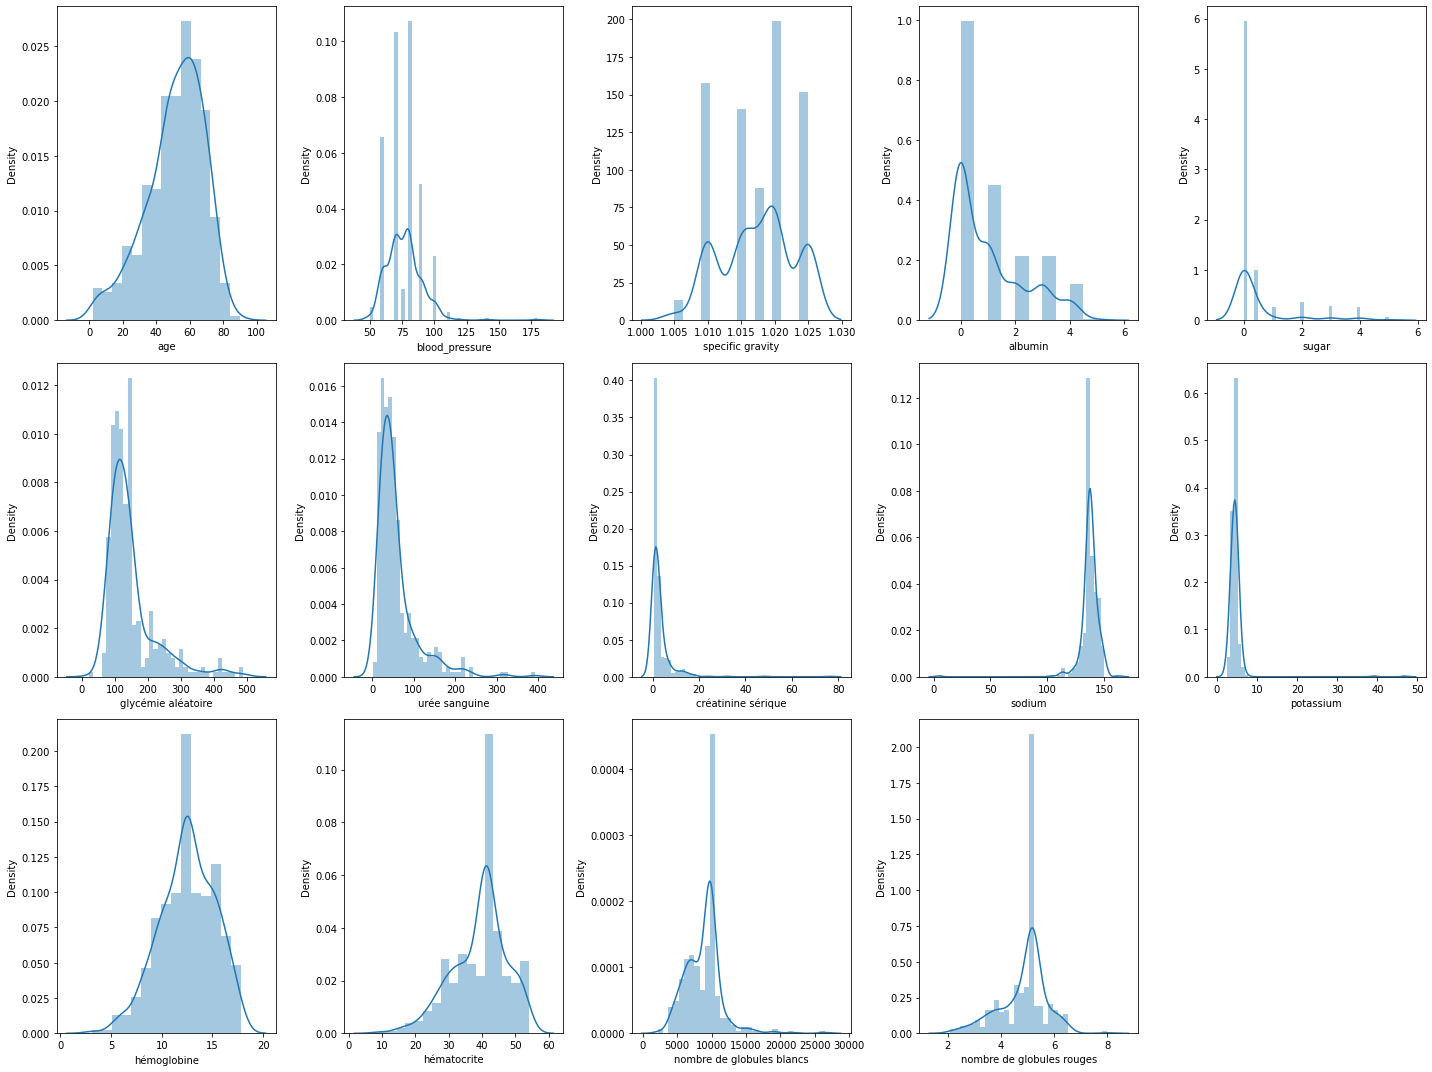

In [ ]:
# checking float_columns (numerical columns) distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in float_columns:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
#Encodage
#je regarde les valeurs de chaque colonnes de object_columns pour déterminer quelle méthode d'encodage appliquer, c'est à dire si les valeurs sont ordinales ou pas et si il y a beaucoupe de classes ou pas
#j'aurais pu me contenter de value_counts
for col in object_columns:
    print(f"{col} has {data[col].unique()} values\n")

rbc has ['normal' 'abnormal'] values

cellule de pus has ['normal' 'abnormal'] values

amas de cellules de pus has ['notpresent' 'present'] values

bactéries has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabète sucré has ['yes' 'no' ' yes' '\tno' '\tyes'] values

maladie coronarienne has ['no' 'yes' '\tno'] values

appétit has ['good' 'poor'] values

œdème pédieux has ['no' 'yes'] values

anémie has ['no' 'yes'] values

classe has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
# les value_counts m'indiquent sur le label majoritaire et donc je peux deviner les erreurs de saisie
data['rbc'].value_counts()

normal      353
abnormal     47
Name: rbc, dtype: int64

In [ ]:
data['cellule de pus'].value_counts()

normal      324
abnormal     76
Name: cellule de pus, dtype: int64

In [ ]:
data['amas de cellules de pus'].value_counts()

notpresent    358
present        42
Name: amas de cellules de pus, dtype: int64

In [ ]:
data['bactéries'].value_counts()

notpresent    378
present        22
Name: bactéries, dtype: int64

In [ ]:
data['hypertension'].value_counts()

no     253
yes    147
Name: hypertension, dtype: int64

In [ ]:
data['diabète sucré'].value_counts() 

no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: diabète sucré, dtype: int64

In [ ]:
# uniformiser la saisie
data['diabète sucré']= data['diabète sucré'].replace(['\tyes', ' yes'],'yes')
data['diabète sucré']= data['diabète sucré'].replace('\tno','no')

In [ ]:
data['diabète sucré'].value_counts()# pour vérifier

no     263
yes    137
Name: diabète sucré, dtype: int64

In [ ]:
data['maladie coronarienne'].value_counts()

no      364
yes      34
\tno      2
Name: maladie coronarienne, dtype: int64

In [ ]:
data['maladie coronarienne']= data['maladie coronarienne'].replace('\tno','no') # uniformiser la saisie

In [ ]:
data['maladie coronarienne'].value_counts() # pour vérifier

no     366
yes     34
Name: maladie coronarienne, dtype: int64

In [ ]:
data['appétit'].value_counts()

good    318
poor     82
Name: appétit, dtype: int64

In [ ]:
data['œdème pédieux'].value_counts()

no     324
yes     76
Name: œdème pédieux, dtype: int64

In [ ]:
data['anémie'].value_counts()

no     340
yes     60
Name: anémie, dtype: int64

In [ ]:
data['classe'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classe, dtype: int64

*   ckd : has chronic kidney disease
*   notckd : has not chronic kidney disease


  



In [ ]:
data['classe']= data['classe'].replace('ckd\t','ckd') # car ici ckd\t veut dire ckd (has chronic kidney diseas), ckd\t est une erreur de saisie

In [ ]:
data['classe'].value_counts()

ckd       250
notckd    150
Name: classe, dtype: int64

In [ ]:
object_columns # pour ne pas se tromper sur les colonnes à encoder

Index(['rbc', 'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'hypertension', 'diabète sucré', 'maladie coronarienne', 'appétit',
       'œdème pédieux', 'anémie', 'classe'],
      dtype='object')

In [ ]:
data

,age,blood_pressure,specific gravity,albumin,sugar,rbc,cellule de pus,amas de cellules de pus,bactéries,glycémie aléatoire,...,hématocrite,nombre de globules blancs,nombre de globules rouges,hypertension,diabète sucré,maladie coronarienne,appétit,œdème pédieux,anémie,classe
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        400 non-null    float64
 1   blood_pressure             400 non-null    float64
 2   specific gravity           400 non-null    float64
 3   albumin                    400 non-null    float64
 4   sugar                      400 non-null    float64
 5   rbc                        400 non-null    object 
 6   cellule de pus             400 non-null    object 
 7   amas de cellules de pus    400 non-null    object 
 8   bactéries                  400 non-null    object 
 9   glycémie aléatoire         400 non-null    float64
 10  urée sanguine              400 non-null    float64
 11  créatinine sérique         400 non-null    float64
 12  sodium                     400 non-null    float64
 13  potassium                  400 non-null    float64

In [ ]:
data.duplicated().value_counts() #s'il y avait eu True, ça aurait voulu dire qu'il y a des duplicated 

False    400
dtype: int64

In [ ]:
data.to_csv('ckd for unsupervised learning.csv')# pour l'utiliser dans la deuxième partie

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

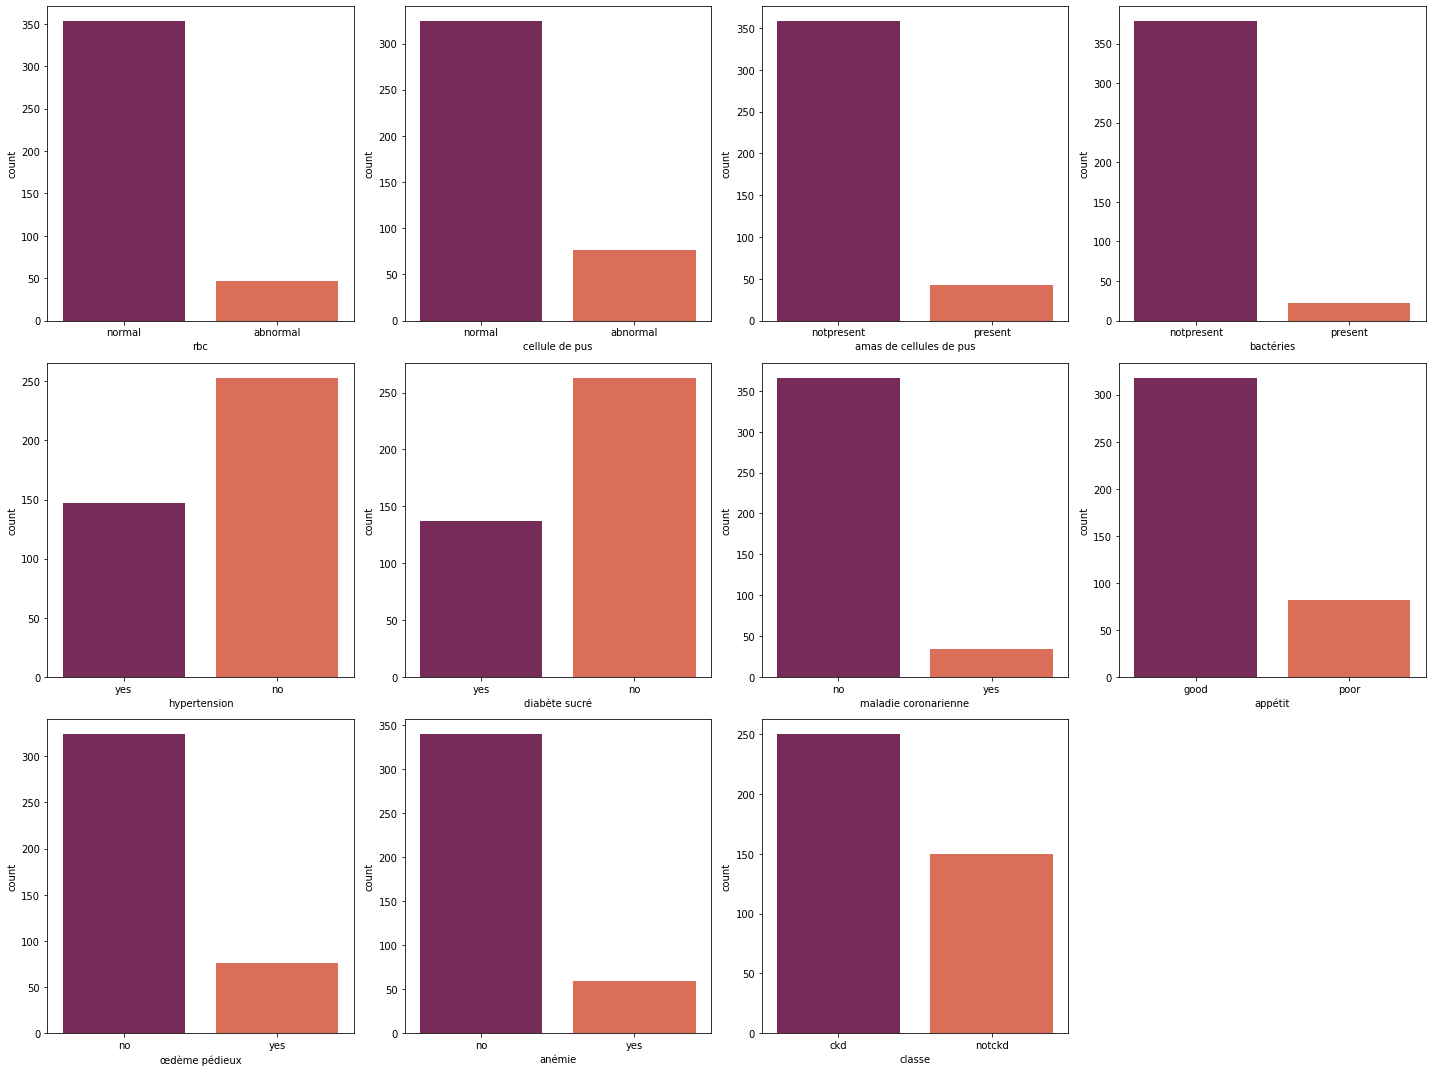

In [ ]:
# looking at object_columns (categorial columns) 
import seaborn as sns
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in object_columns:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
#Encodage LabelEncoder car les valeurs catégorielles sont bnaires 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in object_columns:
    data[col] = le.fit_transform(data[col])

data.head(3)

,age,blood_pressure,specific gravity,albumin,sugar,rbc,cellule de pus,amas de cellules de pus,bactéries,glycémie aléatoire,...,hématocrite,nombre de globules blancs,nombre de globules rouges,hypertension,diabète sucré,maladie coronarienne,appétit,œdème pédieux,anémie,classe
0,48.0,80.0,1.02,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.02,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.01,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,5.2,0,1,0,1,0,1,0


In [ ]:
data.columns #pour vérifier

Index(['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar', 'rbc',
       'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges', 'hypertension', 'diabète sucré',
       'maladie coronarienne', 'appétit', 'œdème pédieux', 'anémie', 'classe'],
      dtype='object')

In [ ]:
data.head(3) # data de sortie du Preprocessing

,age,blood_pressure,specific gravity,albumin,sugar,rbc,cellule de pus,amas de cellules de pus,bactéries,glycémie aléatoire,...,hématocrite,nombre de globules blancs,nombre de globules rouges,hypertension,diabète sucré,maladie coronarienne,appétit,œdème pédieux,anémie,classe
0,48.0,80.0,1.02,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.02,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.01,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,5.2,0,1,0,1,0,1,0


On remarque que dans la colonne classe, ckd a été encodé 0 et notckd  a été encodé 1, ceci est dû au fait que la première valeur rencontrée lors de l'encodage c'est ckd c'est pour cette raison qu'elle a été encodée 0 (voir la première ligne du dataframe), et notckd est la deuxième valeurs rencontrée c'est pour cela qu'elle a été encodée 1.

In [ ]:
data.info() # pour vérifier 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        400 non-null    float64
 1   blood_pressure             400 non-null    float64
 2   specific gravity           400 non-null    float64
 3   albumin                    400 non-null    float64
 4   sugar                      400 non-null    float64
 5   rbc                        400 non-null    int64  
 6   cellule de pus             400 non-null    int64  
 7   amas de cellules de pus    400 non-null    int64  
 8   bactéries                  400 non-null    int64  
 9   glycémie aléatoire         400 non-null    float64
 10  urée sanguine              400 non-null    float64
 11  créatinine sérique         400 non-null    float64
 12  sodium                     400 non-null    float64
 13  potassium                  400 non-null    float64

In [ ]:
float_columns # pour utiliser le noms des colonne dans le code visualisation

Index(['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges'],
      dtype='object')

In [ ]:
data[['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar',# afin de voir comment on peut grouper les colonnes pour améliorer la visualisation en boxplot
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges']].describe()

,age,blood_pressure,specific gravity,albumin,sugar,glycémie aléatoire,urée sanguine,créatinine sérique,sodium,potassium,hémoglobine,hématocrite,nombre de globules blancs,nombre de globules rouges
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,39.260000,8775.500000,4.868750
std,16.974966,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.191162,2597.309144,0.871606
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,41.000000,9450.000000,5.200000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9800.000000,5.200000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [ ]:
# on peut les grouper en cinq groupes selon l'intervalle de variation des valeurs (en prenant en compte 'mean') :
#groupe1 = ['age', 'blood_pressure','urée sanguine','hémoglobine', 'hématocrite']
#groupe2 = ['specific gravity', 'albumin', 'sugar']
#groupe3 = ['glycémie aléatoire', 'sodium']
#groupe4 = ['créatinine sérique', 'potassium', 'nombre de globules rouges']
#groupe5 = ['nombre de globules blancs']

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.


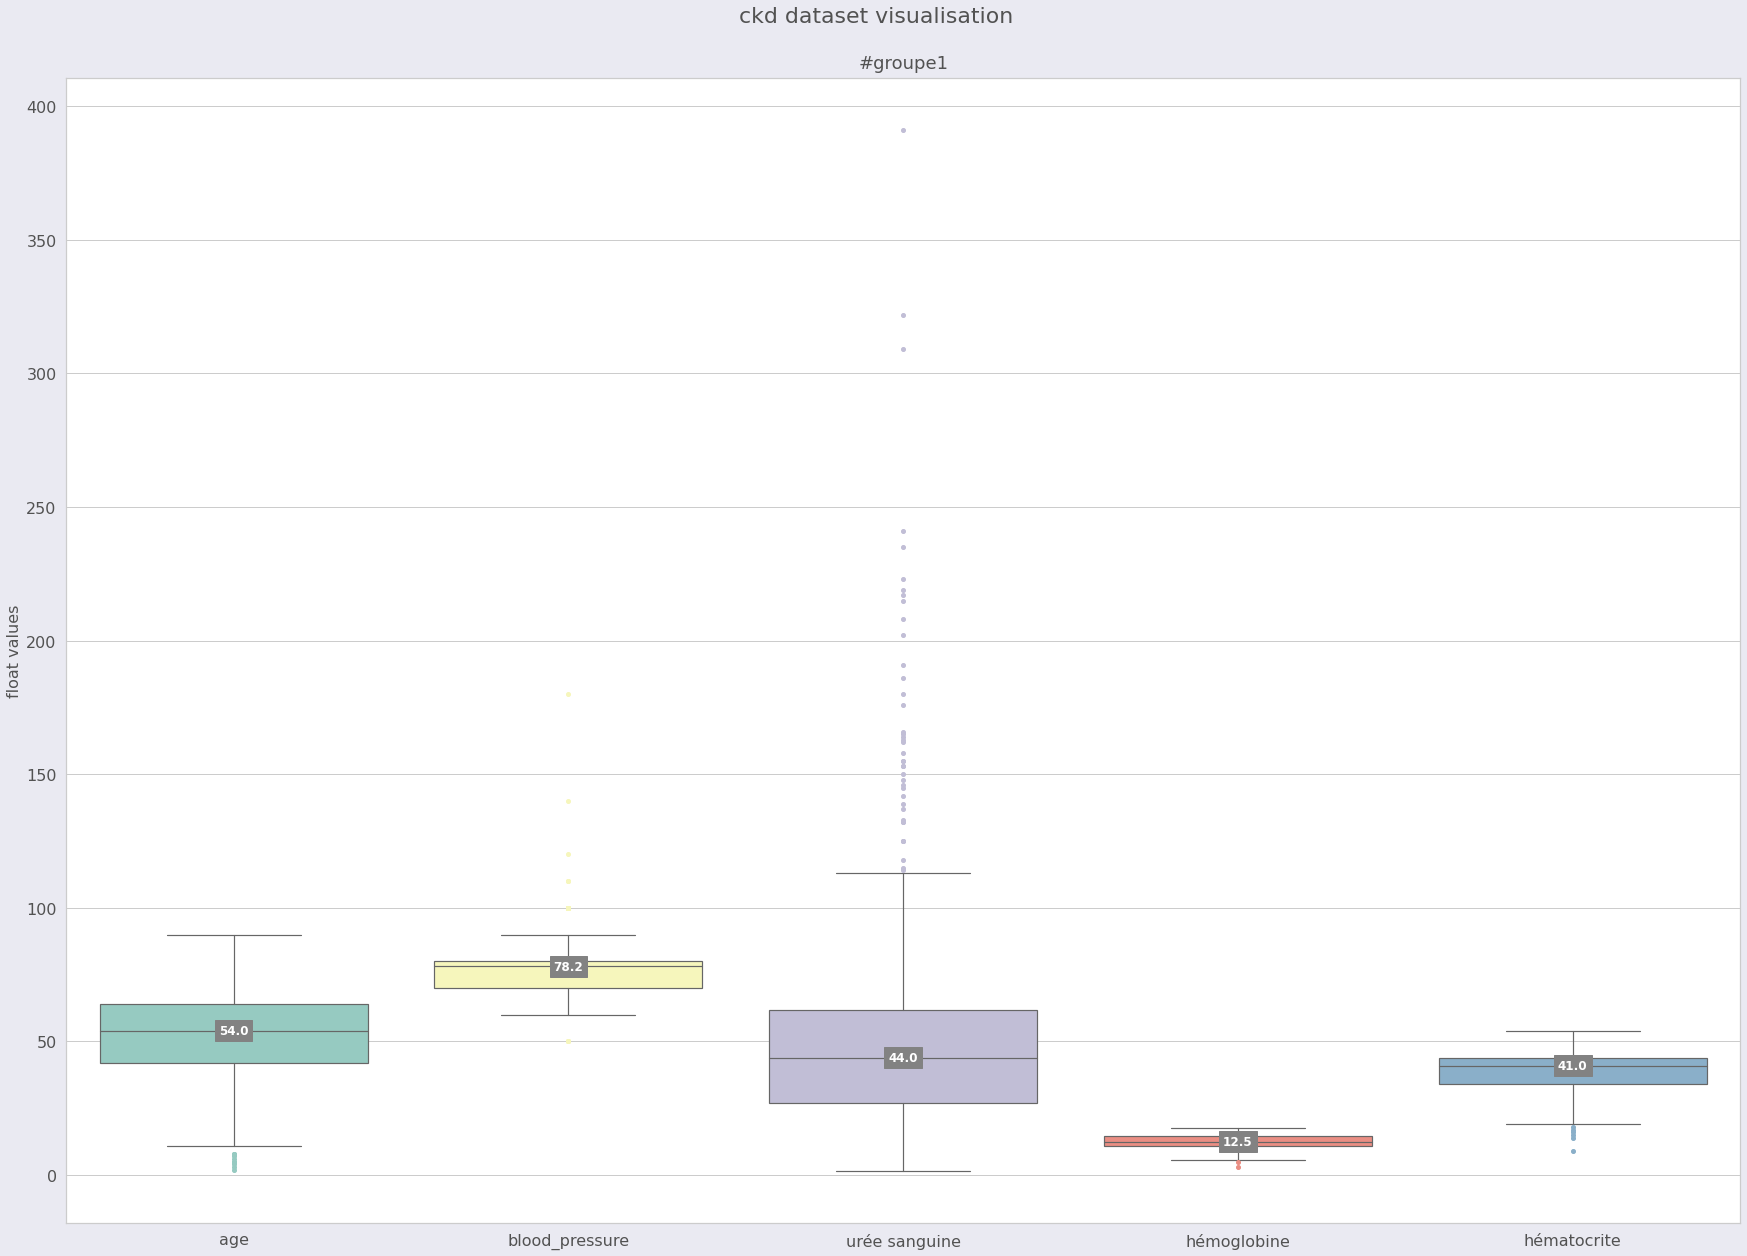

In [ ]:
# visualisation de la data en boxplot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#groupe1
# Créer une figure et un sous-plot
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(30, 20), facecolor=facecolor)

# Créer un box plot
x = sns.boxplot(data=data,
                palette='Set3',
                linewidth=1.2,
                fliersize=2,
                order=['age', 'blood_pressure','urée sanguine','hémoglobine', 'hématocrite'],
flierprops=dict(marker='o', markersize=4))

# Définir la police des étiquettes
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}
     
ax.set_ylabel('float values', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)

# Définir un titre
title = 'ckd dataset visualisation'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = '#groupe1' #'Source: Kaggle'
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.92)

# Définir la couleur des points aberrants
for i, box in enumerate(ax.artists):
  col = box.get_facecolor()
  plt.setp(ax.lines[i*6+5], mfc=col, mec=col)

# Définir les étiquettes pour les valeurs médianes
lines = ax.get_lines()
categories = ax.get_xticks()
      
for cat in categories:
  y = round(lines[4+cat*6].get_ydata()[0],1)
  ax.text(cat,
             y,
             f'{y}',
             ha='center',
             va='center',
          	  fontweight='semibold',
             size=12,
             color='white',
             bbox=dict(facecolor='#828282', edgecolor='#828282')
      )
# Enregistrez le graphique sous forme d’image
ax.get_figure().savefig('/content/ckd dataset visualisation 1.svg')

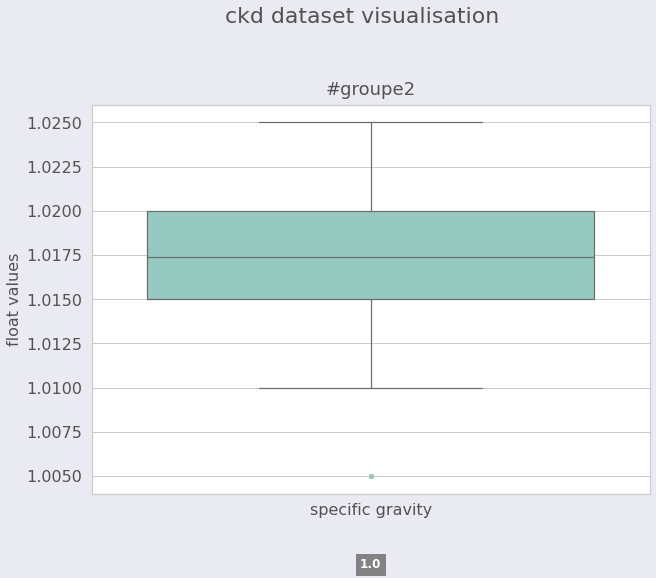

In [ ]:
#groupe2
# Créer une figure et un sous-plot
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(10, 8), facecolor=facecolor)

# Créer un box plot
x = sns.boxplot(data=data,
                palette='Set3',
                linewidth=1.2,
                fliersize=2,
                order=['specific gravity'],
flierprops=dict(marker='o', markersize=4))

# Définir la police des étiquettes
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}
     
ax.set_ylabel('float values', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)

# Définir un titre
title = 'ckd dataset visualisation'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = '#groupe2' #'Source: Kaggle'
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.80)

# Définir la couleur des points aberrants
for i, box in enumerate(ax.artists):
  col = box.get_facecolor()
  plt.setp(ax.lines[i*6+5], mfc=col, mec=col)

# Définir les étiquettes pour les valeurs médianes
lines = ax.get_lines()
categories = ax.get_xticks()
      
for cat in categories:
  y = round(lines[4+cat*6].get_ydata()[0],1)
  ax.text(cat,
             y,
             f'{y}',
             ha='center',
             va='center',
          	  fontweight='semibold',
             size=12,
             color='white',
             bbox=dict(facecolor='#828282', edgecolor='#828282')
      )
# Enregistrez le graphique sous forme d’image
ax.get_figure().savefig('/content/ckd dataset visualisation 2.svg')

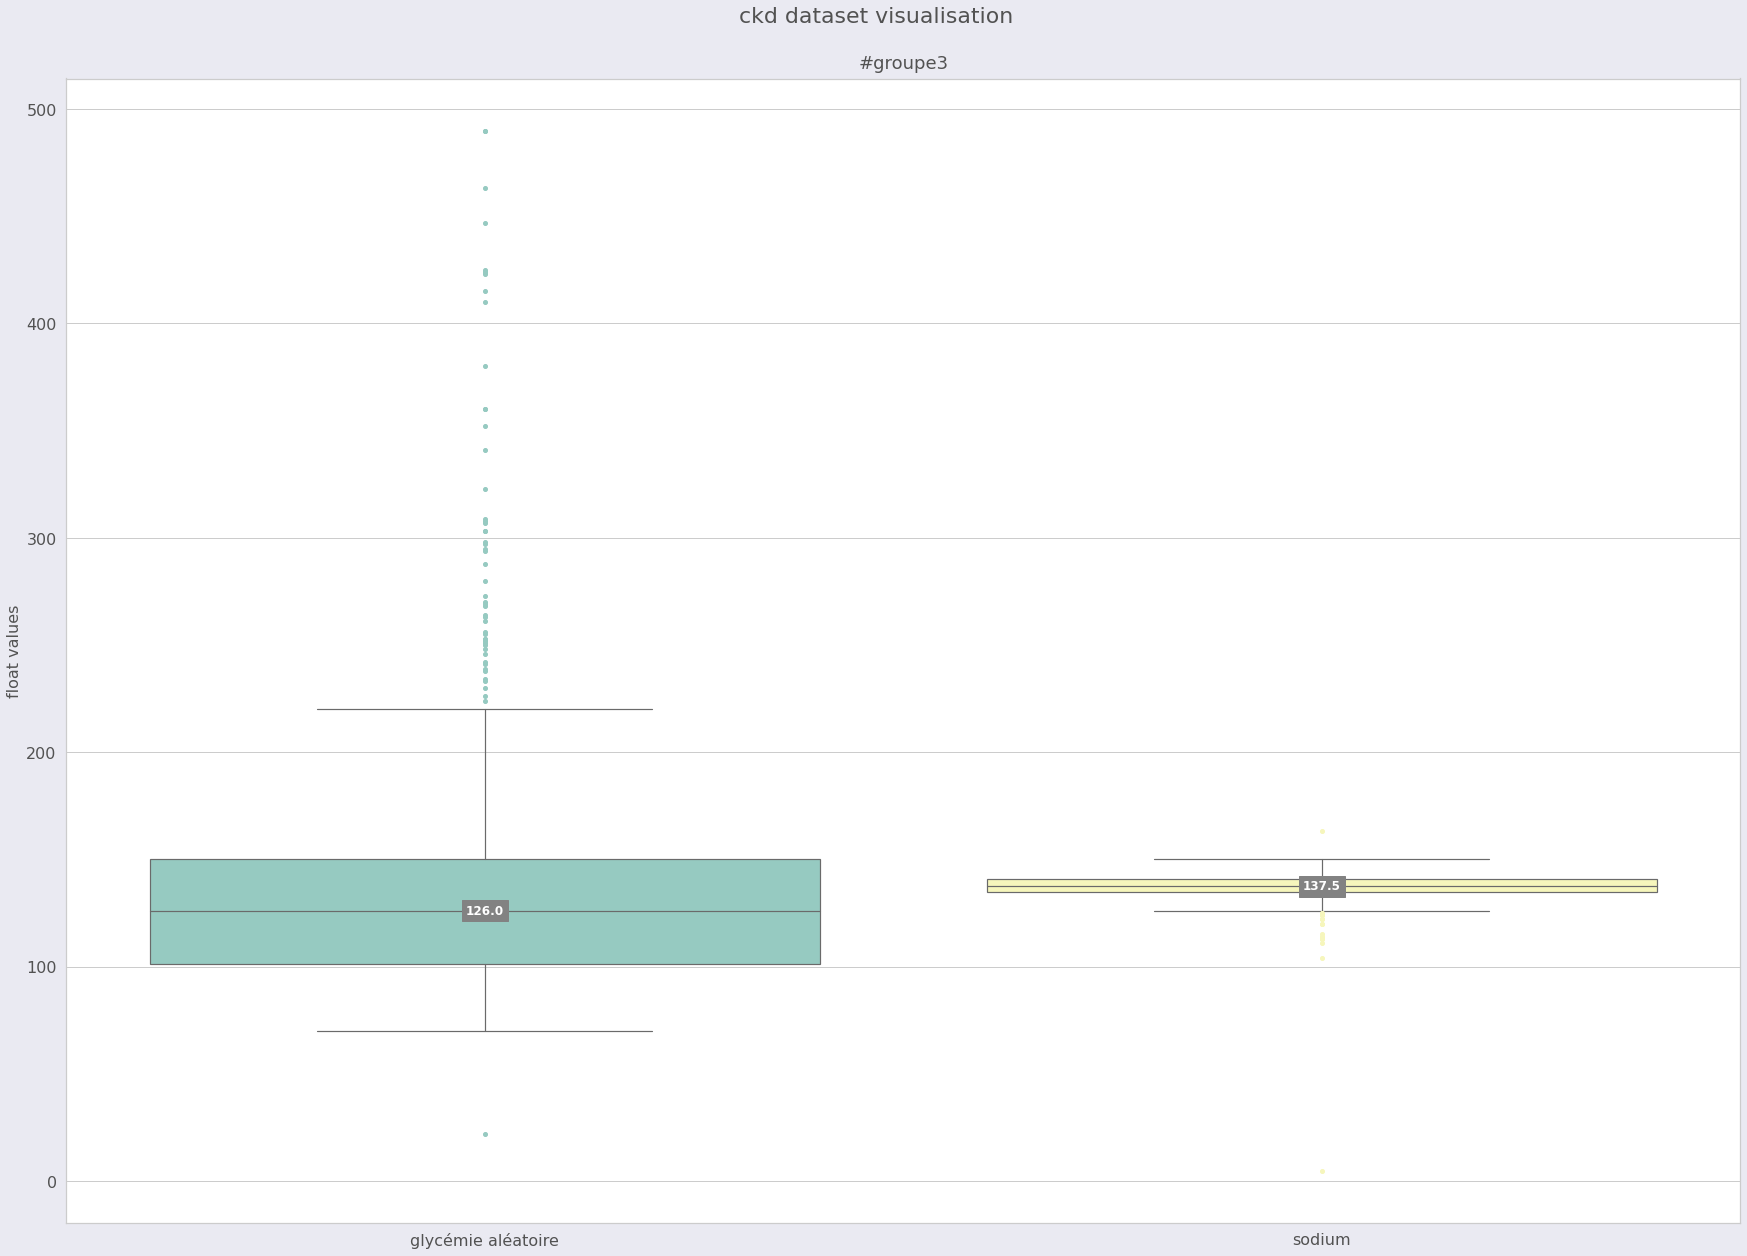

In [ ]:
#groupe3
# Créer une figure et un sous-plot
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(30, 20), facecolor=facecolor)

# Créer un box plot
x = sns.boxplot(data=data,
                palette='Set3',
                linewidth=1.2,
                fliersize=2,
                order=['glycémie aléatoire', 'sodium'],
flierprops=dict(marker='o', markersize=4))

# Définir la police des étiquettes
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}
     
ax.set_ylabel('float values', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)

# Définir un titre
title = 'ckd dataset visualisation'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = '#groupe3' #'Source: Kaggle'
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.92)

# Définir la couleur des points aberrants
for i, box in enumerate(ax.artists):
  col = box.get_facecolor()
  plt.setp(ax.lines[i*6+5], mfc=col, mec=col)

# Définir les étiquettes pour les valeurs médianes
lines = ax.get_lines()
categories = ax.get_xticks()
      
for cat in categories:
  y = round(lines[4+cat*6].get_ydata()[0],1)
  ax.text(cat,
             y,
             f'{y}',
             ha='center',
             va='center',
          	  fontweight='semibold',
             size=12,
             color='white',
             bbox=dict(facecolor='#828282', edgecolor='#828282')
      )
# Enregistrez le graphique sous forme d’image
ax.get_figure().savefig('/content/ckd dataset visualisation 3.svg')

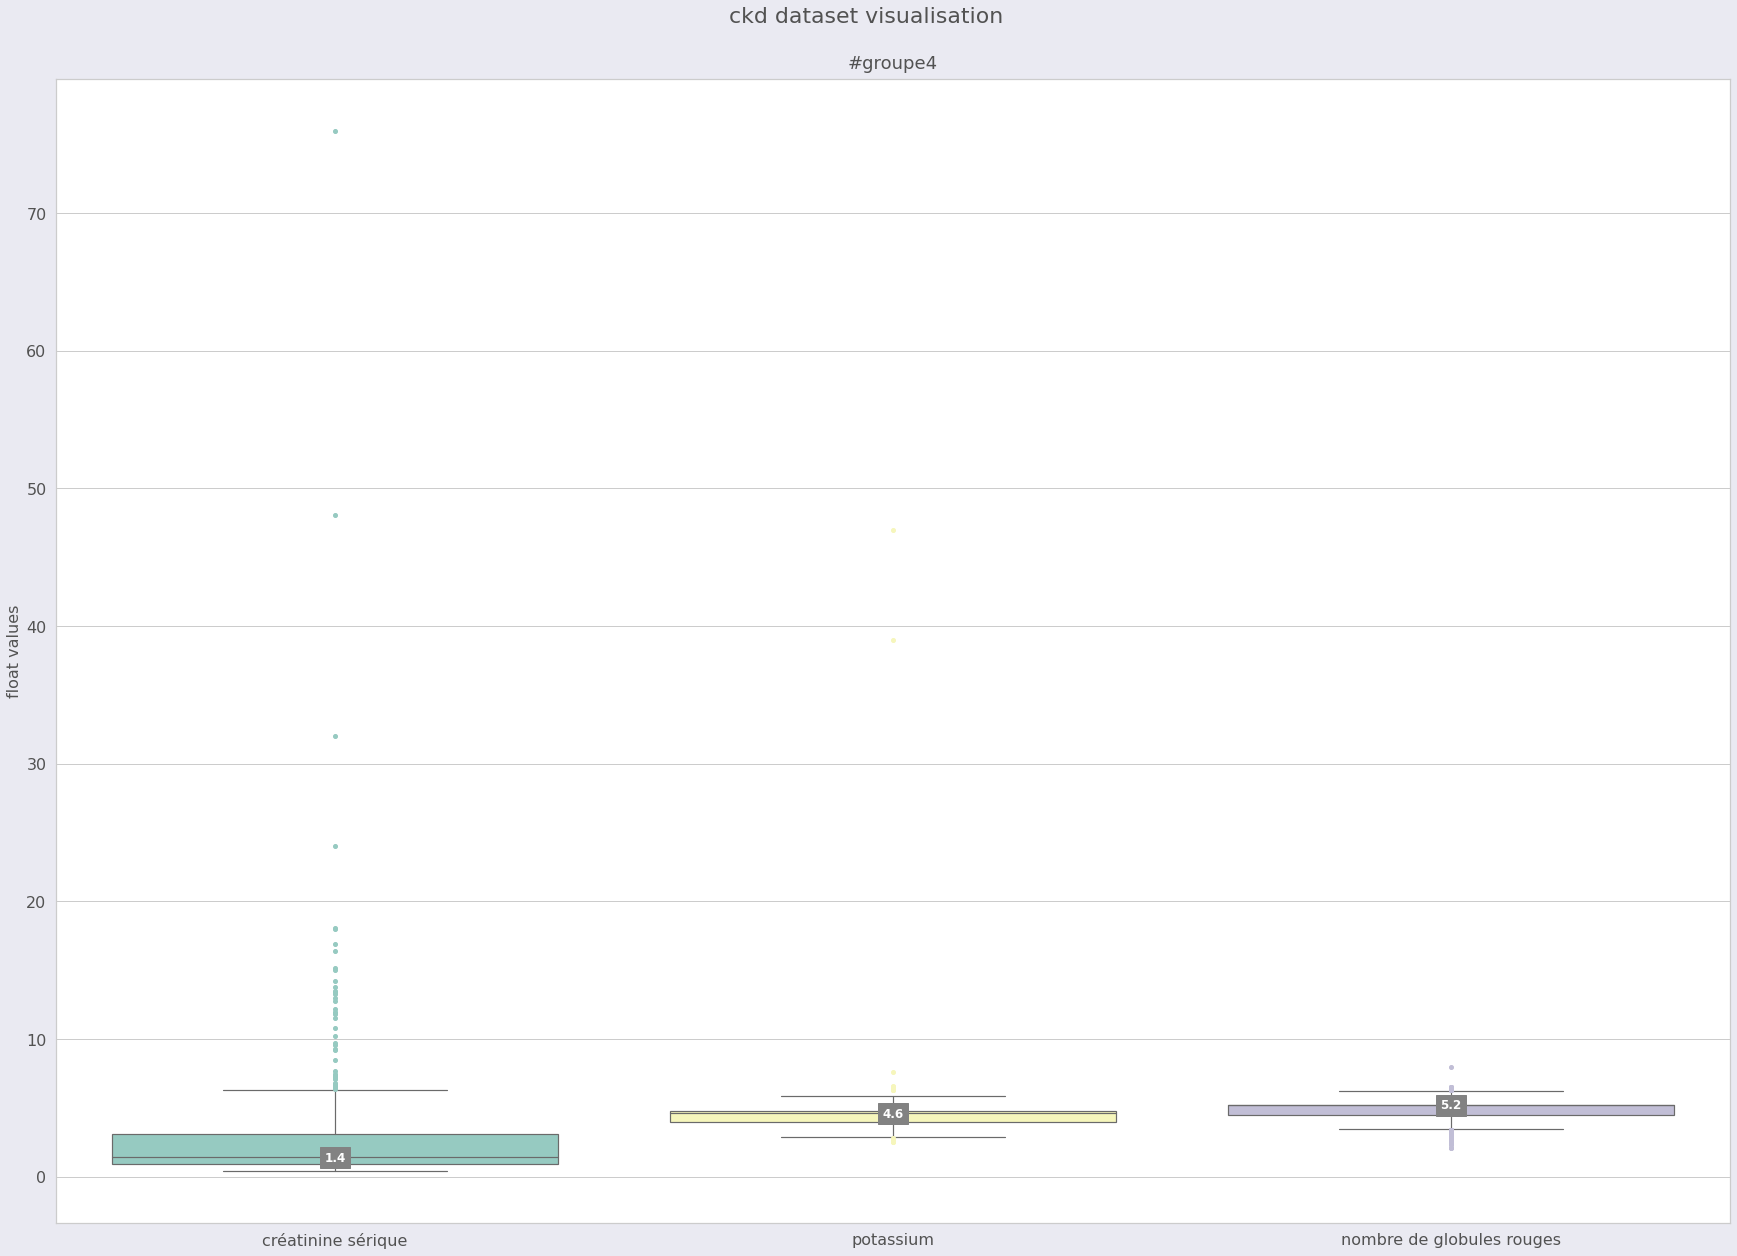

In [ ]:
#groupe4
# Créer une figure et un sous-plot
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(30, 20), facecolor=facecolor)

# Créer un box plot
x = sns.boxplot(data=data,
                palette='Set3',
                linewidth=1.2,
                fliersize=2,
                order=['créatinine sérique', 'potassium', 'nombre de globules rouges'],
flierprops=dict(marker='o', markersize=4))

# Définir la police des étiquettes
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}
     
ax.set_ylabel('float values', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)

# Définir un titre
title = 'ckd dataset visualisation'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = '#groupe4' #'Source: Kaggle'
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.92)

# Définir la couleur des points aberrants
for i, box in enumerate(ax.artists):
  col = box.get_facecolor()
  plt.setp(ax.lines[i*6+5], mfc=col, mec=col)

# Définir les étiquettes pour les valeurs médianes
lines = ax.get_lines()
categories = ax.get_xticks()
      
for cat in categories:
  y = round(lines[4+cat*6].get_ydata()[0],1)
  ax.text(cat,
             y,
             f'{y}',
             ha='center',
             va='center',
          	  fontweight='semibold',
             size=12,
             color='white',
             bbox=dict(facecolor='#828282', edgecolor='#828282')
      )
# Enregistrez le graphique sous forme d’image
ax.get_figure().savefig('/content/ckd dataset visualisation 4.svg')

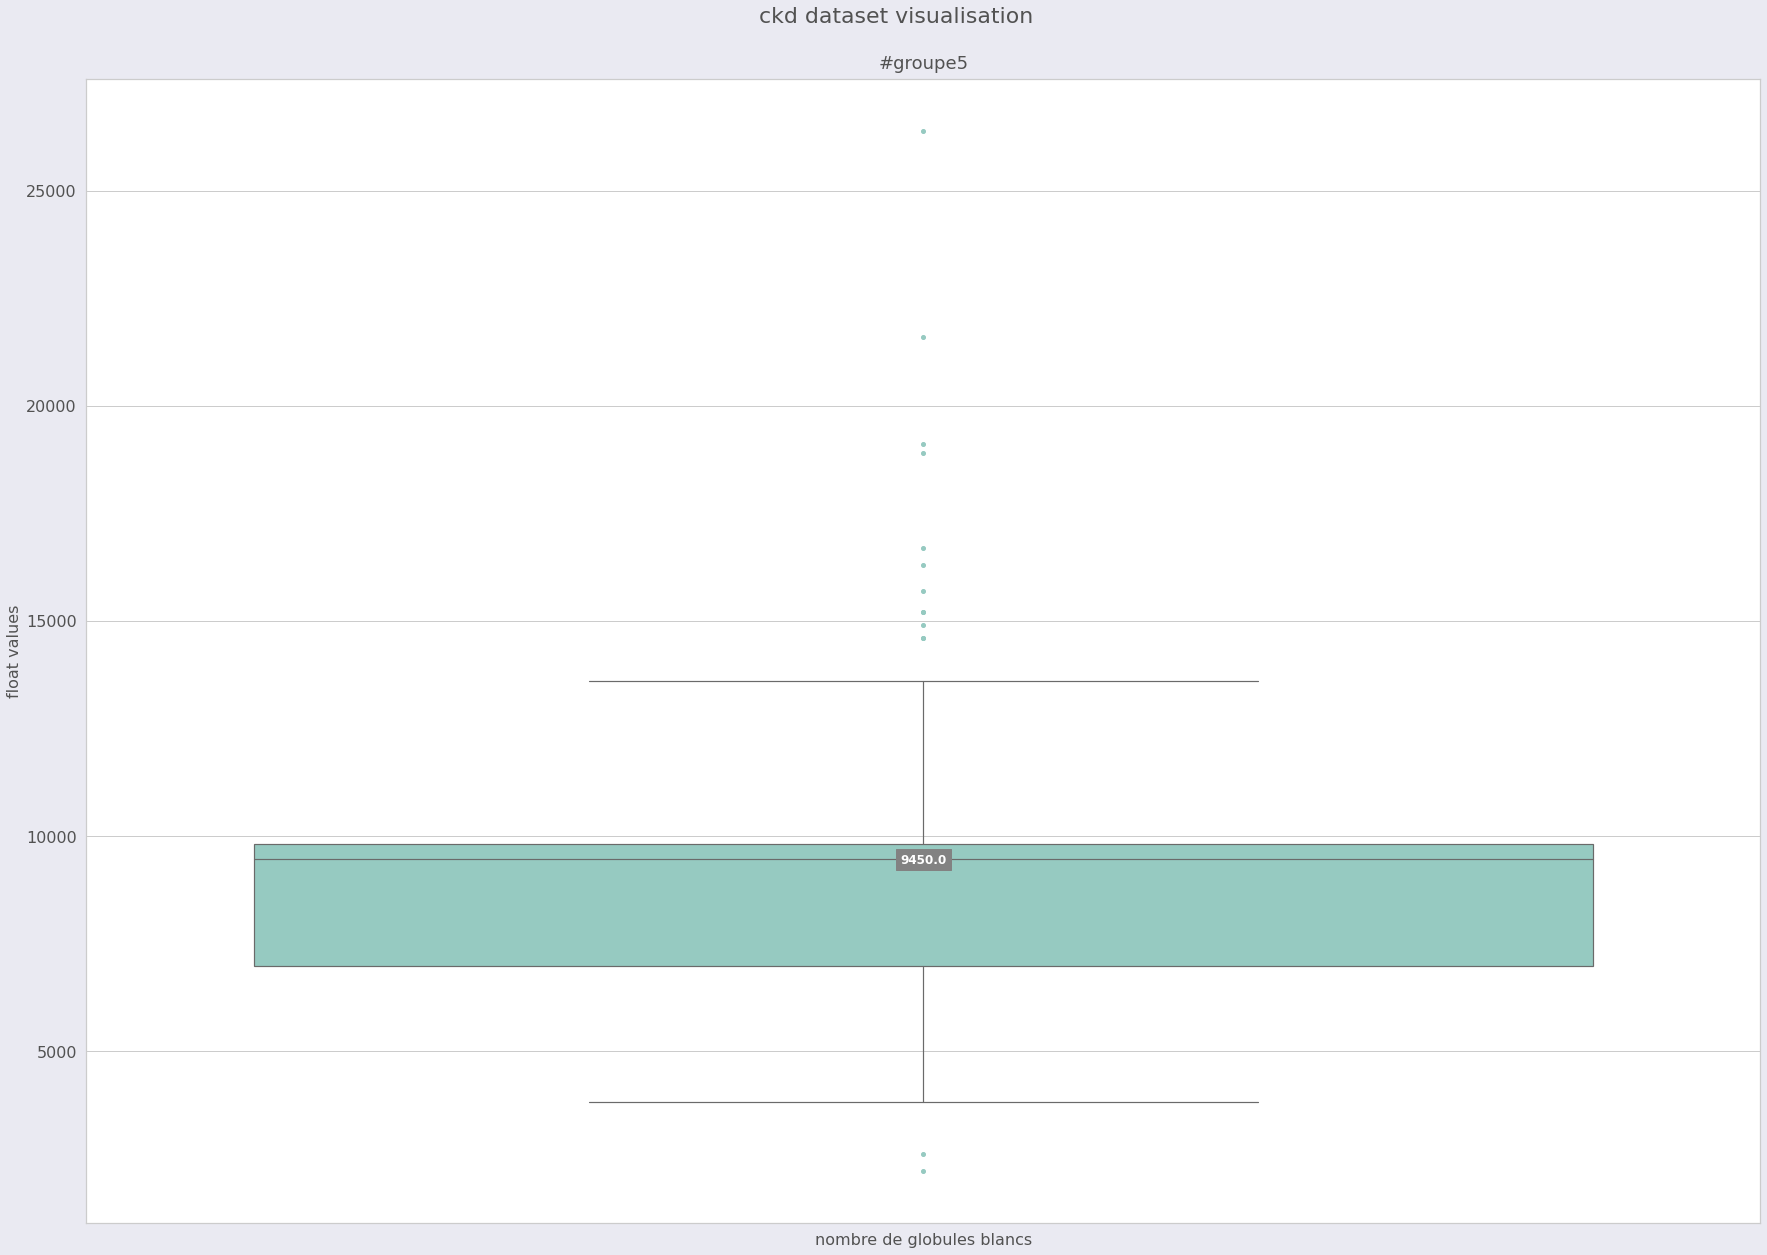

In [ ]:
#groupe5
# Créer une figure et un sous-plot
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(30, 20), facecolor=facecolor)

# Créer un box plot
x = sns.boxplot(data=data,
                palette='Set3',
                linewidth=1.2,
                fliersize=2,
                order=['nombre de globules blancs'],
flierprops=dict(marker='o', markersize=4))

# Définir la police des étiquettes
font_color = '#525252'
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Calibri'}
     
ax.set_ylabel('float values', fontsize=16, color=font_color, **hfont)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color, **hfont)

# Définir un titre
title = 'ckd dataset visualisation'
fig.suptitle(title, y=.97, fontsize=22, color=font_color, **csfont)
subtitle = '#groupe5' #'Source: Kaggle'
plt.title(subtitle, fontsize=18, pad=10, color=font_color, **hfont)
plt.subplots_adjust(top=0.92)

# Définir la couleur des points aberrants
for i, box in enumerate(ax.artists):
  col = box.get_facecolor()
  plt.setp(ax.lines[i*6+5], mfc=col, mec=col)

# Définir les étiquettes pour les valeurs médianes
lines = ax.get_lines()
categories = ax.get_xticks()
      
for cat in categories:
  y = round(lines[4+cat*6].get_ydata()[0],1)
  ax.text(cat,
             y,
             f'{y}',
             ha='center',
             va='center',
          	  fontweight='semibold',
             size=12,
             color='white',
             bbox=dict(facecolor='#828282', edgecolor='#828282')
      )
# Enregistrez le graphique sous forme d’image
ax.get_figure().savefig('/content/ckd dataset visualisation 5.svg')

In [ ]:
data.columns

Index(['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar', 'rbc',
       'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges', 'hypertension', 'diabète sucré',
       'maladie coronarienne', 'appétit', 'œdème pédieux', 'anémie', 'classe'],
      dtype='object')

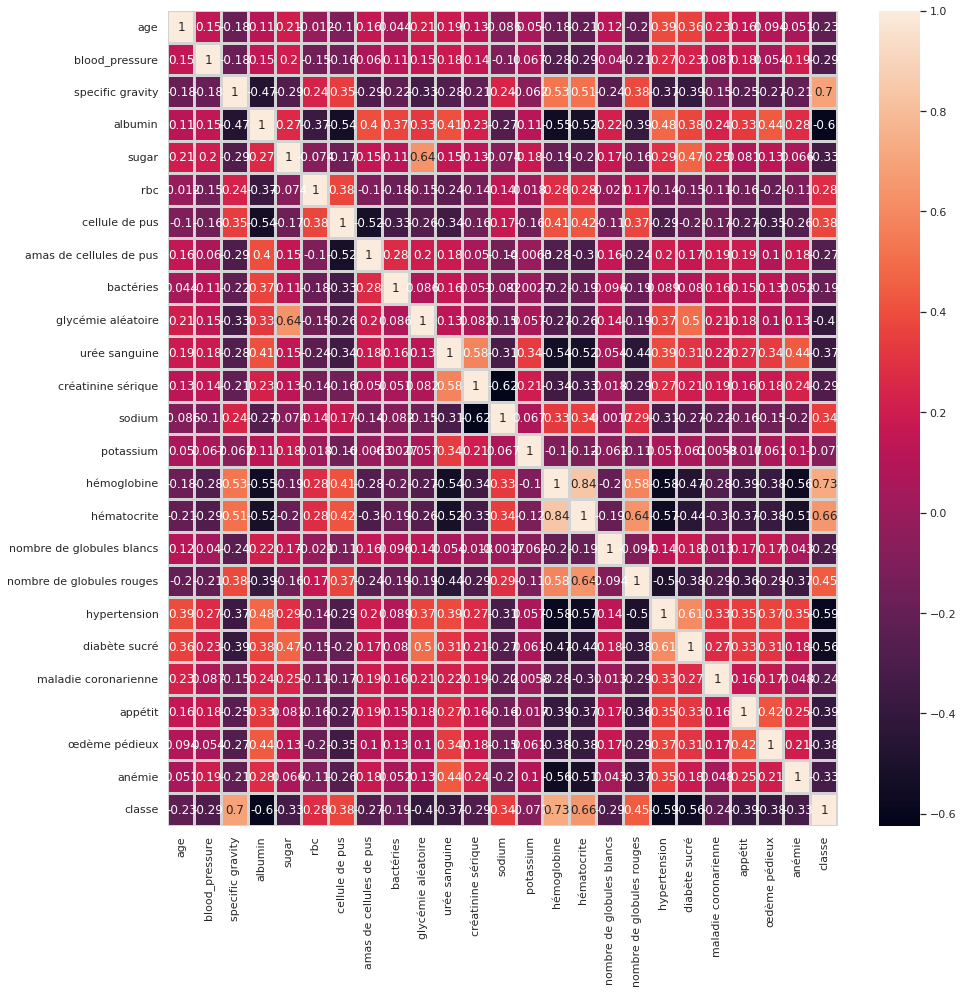

In [ ]:
#heatmap of data
plt.figure(figsize = (15, 15))

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [ ]:
#Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score,recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
X = data[['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar', 'rbc',
       'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges', 'hypertension', 'diabète sucré',
       'maladie coronarienne', 'appétit', 'œdème pédieux', 'anémie']]
y = data['classe']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
y_test

132    0
309    1
341    1
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: classe, Length: 120, dtype: int64

In [ ]:
logreg = LogisticRegression(solver='liblinear',random_state=123)   #build our logistic model, solver='liblinear' resoud le problème de max_iter
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy logistic regression ={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy logistic regression =0.97


In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
132,0,0
309,1,1
341,1,1
196,0,0
246,0,0
...,...,...
216,0,0
259,1,1
49,0,0
238,0,0


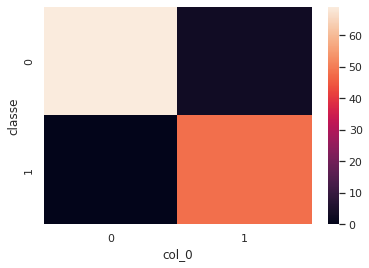

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred)
sns.heatmap(confusion_matrix)

In [ ]:
print(f"confusion matrix: \n{metrics.confusion_matrix(y_test,y_pred)}\n")


confusion matrix: 
[[69  3]
 [ 0 48]]



Dans notre cas TPR = 69 et FNR = 0, TNR = 48 et FPR = 3.

In [ ]:
logreg_acc=accuracy_score(y_test, y_pred)
print(f"accuracy on test set : \n{round(logreg_acc,2)}\n")

accuracy on test set : 
0.98



In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        72
           1       0.94      1.00      0.97        48

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



Pour valider le modèle on doit avoir : TPR > FNR (pour bien prédire la classe positive) et TNR > FPR (pour bien prédire la classe négative)  

*(NB: TPR = True Positive Rate, FNR = False Negative Rate, TNR = True Negative Rate, FPR = False Positive Rate).* ??? voir site internet (https://blent.ai/valider-un-modele-de-classification/) pour valider le modèle, et faire la même chose avec les autre, remarque : le taux de faux négative est à surveiller d'un point de vue médical donc la validation du modèle dépend aussi de cet indicateur.

In [ ]:
#KNN et best k
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train, y_train);
Y_pred = knn5.predict(x_test)
print(f"confusion matrix: \n{metrics.confusion_matrix(y_test,Y_pred)}\n")
print("-"*50) #pour les traits
print( "Accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_pred),2)))

confusion matrix: 
[[47 25]
 [ 7 41]]

--------------------------------------------------
Accuracy : 0.73


In [ ]:
#testing with different k=[1,100]
accs = []
k_grid = range(1,100,1)
for k in k_grid:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    accs.append(metrics.accuracy_score(y_test,y_predict))#accuracies

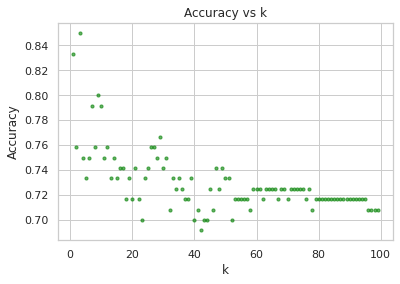

In [ ]:
#visualisation avec k=[1,100]
plt.scatter(k_grid,accs,c='green',marker='o',s=10,alpha=0.6)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
# Parameter grid.
k_grid = np.arange(1,100,1)
parameters = {'n_neighbors':k_grid}

# Optimize the k.
gridCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=10, n_jobs = -1)       # "n_jobs = -1" means "use all the CPU cores".
gridCV.fit(x_train, y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

Best k : 1


In [ ]:
# Test with the best k.
KNN_best = KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(x_train, y_train)
Y_predi = KNN_best.predict(x_test)
print( "Best KNN Accuracy : " + str(np.round(metrics.accuracy_score(y_test,Y_predi),2)))

Best KNN Accuracy : 0.83


In [ ]:
knn_acc = accuracy_score(y_test, Y_predi)

print(f"Training Accuracy of KNN is {round(accuracy_score(y_train, knn.predict(x_train)),2)}")
print(f"Test Accuracy of KNN is {round(knn_acc,2)} \n")

Training Accuracy of KNN is 0.67
Test Accuracy of KNN is 0.83 



In [ ]:
print(f"confusion matrix: \n{metrics.confusion_matrix(y_test,Y_predi)}\n")
print(classification_report(y_test,Y_predi))

confusion matrix: 
[[61 11]
 [ 9 39]]

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        72
           1       0.78      0.81      0.80        48

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120



In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=3,max_depth=9,criterion='entropy') # ici max_depth a la valeur par défaut idem pour les autres hyperparamètres non mentionnés, mais nous allons voir ci-dessous comment bien définir cet hyperparamètre ainsi que d'autres hyperparamètres de DecisionTreeClassifier
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=3)

In [ ]:
y_predicted_val=model.predict(x_train)
print("The model accuracy on train set : ",round(accuracy_score(y_train,y_predicted_val),2))
y_predicted = model.predict(x_test)
print("The model accuracy on test set : ",round(accuracy_score(y_test, y_predicted),2))
print(f"confusion matrix: \n{metrics.confusion_matrix(y_test,y_predicted)}\n")
print(classification_report(y_test,y_predicted))

The model accuracy on train set :  1.0
The model accuracy on test set :  1.0
confusion matrix: 
[[72  0]
 [ 0 48]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



En modifiant la valeur de max_depth on obtient des accuracy majoritairement égale à 1.0, ce qui signifie qu'on est dans le cas d'un overfitting, notre modèle n'est pas bon puisqu'il va avoir tendance à mémoriser au lieu d'apprendre, il est donc nécessaire de rechercher une valeur de max_depth qui soit de bonne qualité pour notre modèle, et c'est ce qu'on va voir ci-dessous.

In [ ]:
#Let's modify the max depth  and check its impact on the accuracy

max_depth = [2,3,4,5,6,7,8,9,10]
training_acc_val = []
validation_acc_val = [] # puisqu'on a diviser notre dataset en deux donc ici validation set correspond en fait au test set.
for max_depth_val in max_depth:
  model = DecisionTreeClassifier(random_state=2,max_depth = max_depth_val)
  model.fit(x_train,y_train)
  y_predicted_val=model.predict(x_train)
  y_predicted = model.predict(x_test)
  acc_val = accuracy_score(y_train,y_predicted_val)
  acc_test = accuracy_score(y_test, y_predicted)
  validation_acc_val.append(acc_test)
  training_acc_val.append(acc_val)

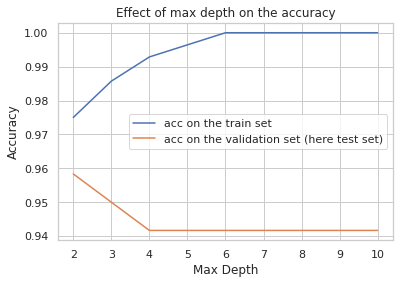

In [ ]:
#Let's plot the accucary!
plt.plot(max_depth, training_acc_val,label = 'acc on the train set')
plt.plot(max_depth, validation_acc_val,label = 'acc on the validation set (here test set)')
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max depth on the accuracy")
plt.show()

**On remarque de la figure ci-dessus, qu'à partir de depth > 2, on a un deccroissement de "l'accuracy on validation set", et un accroissement de "l'accuracuy on train set" ce qui signifie qu'il y a overfitting, de ce fait on peut définir depth = 2 comme valeur optimale pour la meilleur accuracy évittant le overfitting.
Cependant, nous allons voir comment bien définir les hyperparamètres de façon à éviter ce overfitting, la méthode qu'on va utiliser traite le cas multicritère donc le depth précédent pris séparément (depth = 2) n'est pas la valeur optimale dans notre cas multicritère (optimisation de plusieurs hyperparamètres en même temps), on verra dans ce qui suit quelle est sa valeur optimale dans ce cas.**
*(NB: dans le cas d'utilisation de méthodes heuristiques et autres méthodes d'approximation, il est plus judicieux d'utiliser la terminologie "solution de bonne qualité" au lieu de la terminologie "solution optimale" qui est réservée à une approche déterministe des problème d'optimisation (méthodes exactes ainsi que pour les méthodes triviales pour les problème combinatoires de type NP-difficile) et qui sous entend la nécessité d'atteindre cet optimum recherché.)*

In [ ]:
#réglage des hyperparamètres DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'], # pour l'hyperparamètre criterion nous avons choisi deux valeurs possibles
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],       # pour l'hyperparamètre max_depth nous avons choisi dix-neuf valeurs possibles, nous avons aussi choisi des valeurs pour le reste des hyperparamètres ci-dessous
    'splitter' : ['best', 'random'], 
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7], 
    'min_samples_split' : [2, 3, 4, 5, 6, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(model, grid_param, cv = 10, n_jobs = -1, verbose = 1, error_score='raise') #model=DecisionTreeClassifier(), cv = 10 : cross validation 10 folds
grid_search_dtc.fit(x_train, y_train)


Fitting 10 folds for each of 4536 candidates, totalling 45360 fits


GridSearchCV(cv=10, error_score='raise',
             estimator=DecisionTreeClassifier(max_depth=10, random_state=2),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
print(f"meilleur réglage :\n{grid_search_dtc.best_params_}\n")
print(f"meilleur score : \n{round(grid_search_dtc.best_score_,2)}\n")

meilleur réglage :
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}

meilleur score : 
0.96



In [ ]:
dtc = grid_search_dtc.best_estimator_ # affectation du meilleur réglage à DecisionTreeClassifier, on remarque que les hyperparamètres ayant valeur par défaut ne sont pas visibles, seules les valeurs qui ne sont pas par défaut sont visibles
dtc

DecisionTreeClassifier(max_depth=10, max_features='auto', random_state=2,
                       splitter='random')

In [ ]:
y_predict_val=dtc.predict(x_train)
print("The best estimator accuracy on train set : ",round(accuracy_score(y_train,y_predict_val),2))
y_predic = dtc.predict(x_test)
dtc_acc = accuracy_score(y_test, y_predic)
print("The best estimator accuracy on test set : ",round(dtc_acc,3))
print(f"confusion matrix: \n{metrics.confusion_matrix(y_test,y_predic)}\n")
print(classification_report(y_test,y_predic))

The best estimator accuracy on train set :  0.96
The best estimator accuracy on test set :  0.933
confusion matrix: 
[[68  4]
 [ 4 44]]

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.92      0.92      0.92        48

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



Pour cette méthode GridSearchCV (ci-dessus), nous avons consifdéré six hyperparamètres, nous leur avons attribué à chacun une liste de valeurs possibles, ce qui nous permets d'avoir : 2 * 19 * 2 * 7 * 6 * 3 = 9576 réglage possibles. Pour éviter une explosion combinatoire de cas, nous avons restreint les listes de valeurs à des valeurs en nombre discret (fini), c'est une méthode pour se rapprocher le plus possible du réglage optimal. aussi nous avons appliquer la méthode cross-validation 10-fold ce qui nous fait en tout 9576 * 10 = 95760 itérations. la méthode choisie le meilleur réglage, celui qui donne le meilleur score training accuracy and validation accuracy.

In [ ]:
X.columns #feature_names

Index(['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar', 'rbc',
       'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges', 'hypertension', 'diabète sucré',
       'maladie coronarienne', 'appétit', 'œdème pédieux', 'anémie'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(500,400))
tree.plot_tree(dtc,filled=True, feature_names=['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar', 'rbc',
       'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges', 'hypertension', 'diabète sucré',
       'maladie coronarienne', 'appétit', 'œdème pédieux', 'anémie'] # à copier coller telle quelle car l'ordre des features est important
       ,class_names=['ckd','notckd'])#pour class_names il est important de respecter l'ordre de l'encodage [0,1]

In [ ]:
print(tree.export_text(dtc, decimals = 3, feature_names=['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar', 'rbc',
       'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges', 'hypertension', 'diabète sucré',
       'maladie coronarienne', 'appétit', 'œdème pédieux', 'anémie']))#features list à copier telle quelle car l'ordre des features est important

|--- œdème pédieux <= 0.758
|   |--- cellule de pus <= 0.064
|   |   |--- class: 0
|   |--- cellule de pus >  0.064
|   |   |--- glycémie aléatoire <= 258.481
|   |   |   |--- hématocrite <= 26.064
|   |   |   |   |--- class: 0
|   |   |   |--- hématocrite >  26.064
|   |   |   |   |--- appétit <= 0.198
|   |   |   |   |   |--- glycémie aléatoire <= 181.072
|   |   |   |   |   |   |--- diabète sucré <= 0.059
|   |   |   |   |   |   |   |--- sugar <= 0.957
|   |   |   |   |   |   |   |   |--- hypertension <= 0.198
|   |   |   |   |   |   |   |   |   |--- albumin <= 0.866
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- albumin >  0.866
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- hypertension >  0.198
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- sugar >  0.957
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- diabète sucré >  0.059
| 

Pour une meilleure interprétation de l'arbre nous avons spécifié les hyperparamètres feature_names et class_names.

On remarque par exemple que le feature correspondant à "hémoglobine", est la racine de l'arbre, et c'est le feature le plus corrélé au target "class" (voir heatmap of data).

On peut faire cet exemple d'interprétation : si hémoglobine inférieur ou égale à 12.95 et créatinine sérique supérieur à 1.15 alors ckd.

autre exemple d'interprétation : si hémoglobine inférieur ou égale à 12.95 et créatinine inférieur ou égale à 1.15 et specific gravity inférieur ou égale à 1.017 alors ckd.

*(NB: à la sortie de chaque noeud on aura toujours yes à gauche et no à droite, les noeuds sont peints pour indiquer la classe majoritaire pour la classification tel que orange pour la classe 0 (ckd) et bleu pour la classe 1 (notckd), on remarque que les feuilles ont les couleurs les plus foncées car elle ne contiennent pas d'impurtés (entropy =0.0), et il n'y a pas de position fixe pour les feuilles, les feuilles oranges par exemple peuvent se retrouver à gauche sur certaines branches et à droite sur d'autres branches à l'issue de la construction de l'arbre. Aussi et concernant le pourquoi O pour la classe ckd et 1 pour notckd, en fait, comme abordé précédemment, cela dépend de la première valeur rencontrée au moment de l'étape encodage, et dans notre cas la première valeur rencontrée est ckd, c'est pour cela qu'elle a été encodée en 0, puis la deuxième notckd en 1).*

In [ ]:
#model random forest
from sklearn.ensemble import RandomForestClassifier 
clf=RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 4, n_estimators = 150, random_state=2)#Creating a random forest with 130 decision trees
clf.fit(x_train, y_train)  #Training our model
y_predic=clf.predict(x_test)  #testing our model
print("random forest Accuracy:", round(accuracy_score(y_test, y_predic),3)) 

random forest Accuracy: 0.975


In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score,recall_score, confusion_matrix

clf_acc = accuracy_score(y_test, y_predic)

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, clf.predict(x_train))}")
print(f"Test Accuracy of Random Forest Classifier is {clf_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_predic)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_predic)}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



On remarque qu'avec notre model RandomForest nous avons amélioré l'accuracy par rapport à celle obtenue pour le model DecisionTree, tel que :    

*   The best Test Accuracy of Decision Tree Classifier = 0.958
*   Test Accuracy of Random Forest Classifier = 0.975




In [ ]:
#Models Comparison
models = pd.DataFrame({
    'Model' : ['LogisticRegression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [logreg_acc, knn_acc, dtc_acc, clf_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,LogisticRegression,0.975000
3,Random Forest Classifier,0.975000
2,Decision Tree Classifier,0.933333
1,KNN,0.833333


In [ ]:
import plotly.express as px
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

Sur les quatres models de supervised learning ci-dessus, nous avons obtenu un meilleur accuracy score de 0.975 pour les deux models LogisticRegression et Random Forest Classifier, (voir d'autres critères comme audoc pour différencier les deux ...)???

In [ ]:
#Partie 2 : apprentissage non-supervisé

In [ ]:
dt = pd.read_csv('/content/ckd for unsupervised learning.csv') 
dt.head()

,Unnamed: 0,age,blood_pressure,specific gravity,albumin,sugar,rbc,cellule de pus,amas de cellules de pus,bactéries,...,hématocrite,nombre de globules blancs,nombre de globules rouges,hypertension,diabète sucré,maladie coronarienne,appétit,œdème pédieux,anémie,classe
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Drop unuseful columns
dt.drop('classe',axis=1,inplace=True)
dt.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
dt.columns

Index(['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar', 'rbc',
       'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'glycémie aléatoire', 'urée sanguine', 'créatinine sérique', 'sodium',
       'potassium', 'hémoglobine', 'hématocrite', 'nombre de globules blancs',
       'nombre de globules rouges', 'hypertension', 'diabète sucré',
       'maladie coronarienne', 'appétit', 'œdème pédieux', 'anémie'],
      dtype='object')

In [ ]:
object_columns = dt.select_dtypes(include=['object']).columns
object_columns

Index(['rbc', 'cellule de pus', 'amas de cellules de pus', 'bactéries',
       'hypertension', 'diabète sucré', 'maladie coronarienne', 'appétit',
       'œdème pédieux', 'anémie'],
      dtype='object')

In [ ]:
#FAMD STEPS
! pip install prince
from prince import FAMD
f = FAMD(n_components =10, n_iter = 100, random_state = 123)
f=f.fit(dt) #pour pouvoir afficher le famd il faut sauvegarder le résultat i.e faire result= (par exemple ou famd =)

famd=f.transform(dt) # transformation de ma dataframe initiale
print(famd) # affichage de cette nouvelle dataframe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
            0         1         2         3         4         5         6  \
0   -0.388767 -0.433678  0.407119 -0.155164  0.081334 -0.003456 -0.031325   
1   -0.677294  0.536024 -0.493557  0.238853  0.075499  0.342845 -0.304559   
2    1.278720 -1.192959  0.334915 -0.068247 -0.775516 -0.182745 -0.855682   
3    2.061543  1.124494 -0.851811 -0.491128  0.581428 -0.310202  0.288734   
4   -0.264283  0.232975 -0.089287 -0.019850 -0.024753 -0.317634 -0.244515   
..        ...       ...       ...       ...       ...       ...       ...   
395 -1.146050 -0.089798  0.032604  0.126744 -0.316226 -0.150812  0.169677   
396 -1.697226  0.085056 -0.048428  0.128770  0.180768  0.190908  0.128167   
397 -1.395987  0.343519 -0.071701  0.244602  0.031330  0.061413 -0.405377   
398 -1.478665  0.399576 -0.006113  0.327676  0.125217  0.338927 -0.058819   
399 -1.514900 -0.181663  0.074244  0.156507  0.142079 

In [ ]:
famd

,0,1,2,3,4,5,6,7,8,9
0,-0.388767,-0.433678,0.407119,-0.155164,0.081334,-0.003456,-0.031325,-0.240938,0.031744,-0.092237
1,-0.677294,0.536024,-0.493557,0.238853,0.075499,0.342845,-0.304559,0.403503,1.147335,0.473386
2,1.278720,-1.192959,0.334915,-0.068247,-0.775516,-0.182745,-0.855682,0.308307,0.696117,-0.654836
3,2.061543,1.124494,-0.851811,-0.491128,0.581428,-0.310202,0.288734,0.565130,0.941163,-1.143916
4,-0.264283,0.232975,-0.089287,-0.019850,-0.024753,-0.317634,-0.244515,0.127349,-0.084009,0.462392
...,...,...,...,...,...,...,...,...,...,...
395,-1.146050,-0.089798,0.032604,0.126744,-0.316226,-0.150812,0.169677,-0.402329,-0.116757,-0.043297
396,-1.697226,0.085056,-0.048428,0.128770,0.180768,0.190908,0.128167,-0.099719,-0.011024,-0.311208
397,-1.395987,0.343519,-0.071701,0.244602,0.031330,0.061413,-0.405377,-0.065885,0.216605,-0.102888
398,-1.478665,0.399576,-0.006113,0.327676,0.125217,0.338927,-0.058819,0.179016,0.526440,-0.119429


In [ ]:
famd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
 3   3       400 non-null    float64
 4   4       400 non-null    float64
 5   5       400 non-null    float64
 6   6       400 non-null    float64
 7   7       400 non-null    float64
 8   8       400 non-null    float64
 9   9       400 non-null    float64
dtypes: float64(10)
memory usage: 31.4 KB


No handles with labels found to put in legend.


[0.29419085 0.07657657 0.07030998 0.05449471 0.0495137  0.04402808
 0.043004   0.04132263 0.03652039 0.03310943]


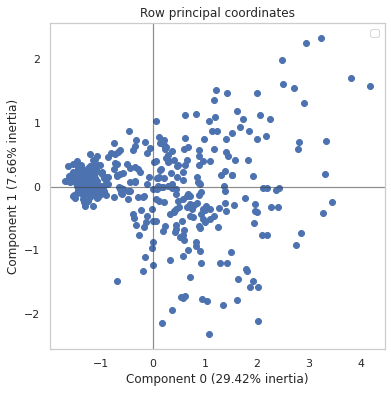

In [ ]:
X_components = f.U_;
print(f.explained_inertia_);
f.plot_row_coordinates(X = dt);

En utilisant FAMD, il est vrai que je perd en interprétabilité, compte tenu de la relation entre les features initiaux et la classe, mais je gagne beaucoup en performance de classification, et celà est visible sur la représentation graphique des classes.

Text(0, 0.5, 'explained variance')

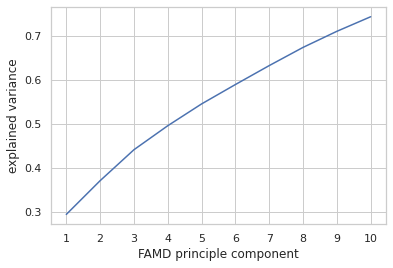

In [ ]:
plt.plot(np.cumsum(f.explained_inertia_))
plt.xticks(np.arange(10),np.arange(10)+1) 
plt.xlabel('FAMD principle component') 
plt.ylabel('explained variance')

In [ ]:
#Agglomerative Clustering
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete') # j'ai choisi n_clusters=2 car je sais que je veux distinguer deux classes, de plus n_clusters=3 m'a donnée un résultat presque similaire à n_clusters=2 
clust_labels=model.fit_predict(famd) 

In [ ]:
df=pd.DataFrame(clust_labels)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,0
398,0


In [ ]:
df.value_counts()

0    399
1      1
dtype: int64

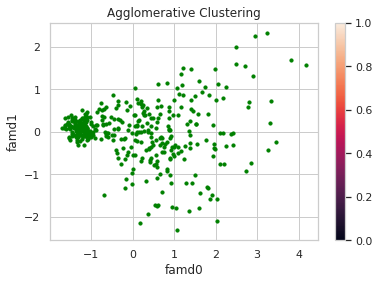

In [ ]:
#Tracez les grappes. 
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(famd[0] , famd[1] , c='green', s=10)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel('famd0')
ax.set_ylabel('famd1')
plt.colorbar(scatter)

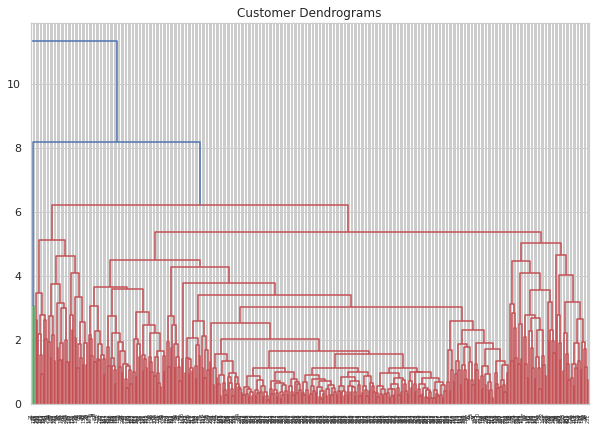

In [ ]:
#Tracez le dendrogramme. 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(famd, method="complete"))

In [ ]:
#Utilisez le clustering k-means. 
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(famd)

KMeans(n_clusters=2, random_state=0)

In [ ]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,1
2,0
3,0
4,1
...,...
395,1
396,1
397,1
398,1


In [ ]:
labels[0].value_counts()

1    228
0    172
Name: 0, dtype: int64

In [ ]:
kmeans.predict(famd)
print(kmeans.cluster_centers_)

[[ 1.22675257 -0.08780917  0.02141966 -0.04105951 -0.02231997 -0.02450878
  -0.00166408 -0.02888876 -0.01820205 -0.00336835]
 [-0.92544492  0.06624201 -0.01615869  0.03097472  0.01683787  0.01848908
   0.00125536  0.02179328  0.01373137  0.00254103]]


In [ ]:
#Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(famd,kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.333


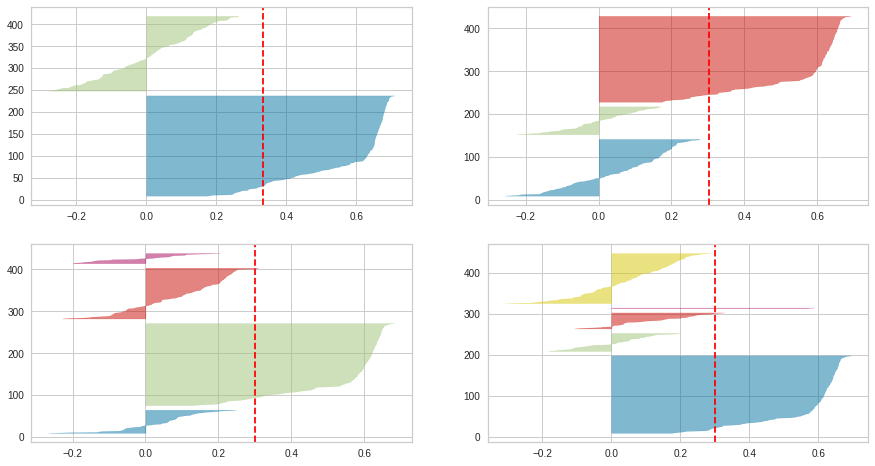

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=123)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(famd)

K = 2 est plus adapté, compte tenue du nombre de silhouette-scores de clusters inférieurs au score de silhouette moyen pour k=3,4,5, les grandes fluctuations de la taille des clusters et également l'épaisseur du tracé de silhouette pour k=3,4,5.

In [ ]:
#Essayez différentes valeurs de k et sélectionnez la meilleure. 
Sum_of_squared_distances = []
K = range(1,15)
for k in K :
  km = KMeans(n_clusters=k)
  km=km.fit(famd)
  Sum_of_squared_distances.append(km.inertia_)

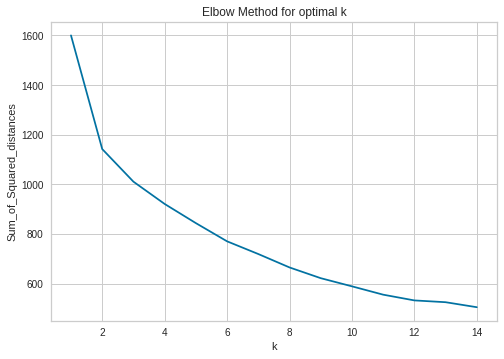

In [ ]:
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_Squared_distances')
plt.title('Elbow Method for optimal k')
plt.show()

k optima est égale à 2, c'est le point coudé.

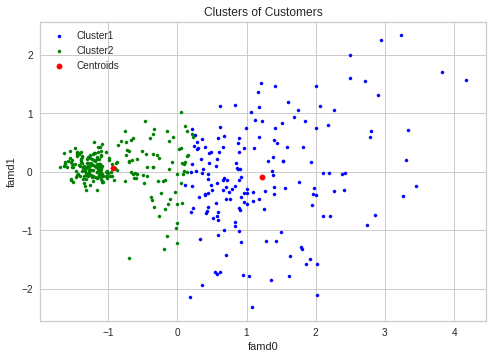

In [ ]:
#Tracez les grappes. 
plt.scatter(famd[0][kmeans.labels_ == 0],   
            famd[1][kmeans.labels_ == 0],s=10,c='blue',label='Cluster1')
plt.scatter(famd[0][kmeans.labels_ == 1],
           famd[1][kmeans.labels_ == 1],s=10,c='green',label='Cluster2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('famd0')
plt.ylabel('famd1')
plt.legend()
plt.show()

On remarque que la méthode Kmeans donne un meilleur clustering que la méthode agglomerative et ce en se référant aux deux représentations des grappes.
les metrics suivantes confirme cette observation.

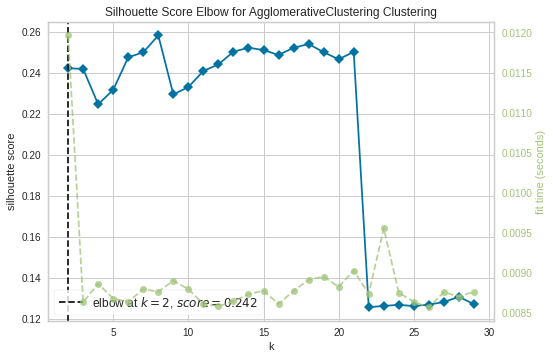

In [ ]:
# Silhouette Score pour Agglomerative Clustering
# Import ElbowVisualizer 
from yellowbrick.cluster import KElbowVisualizer 
model = AgglomerativeClustering() 
# k est la plage du nombre de clusters. 
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True) 
visualizer.fit(famd) # Adapter les données au visualiseur 
visualizer.show() # Finaliser et rendre la figure

/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:330: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in

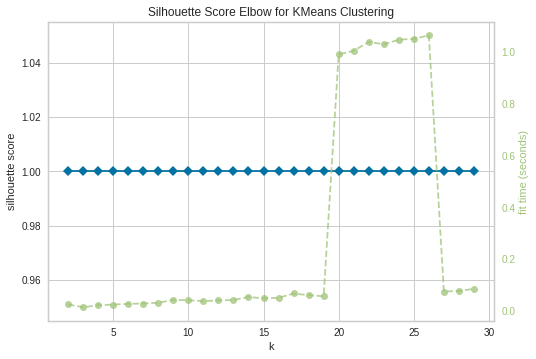

In [ ]:
# Silhouette Score pour KMeans
# Import ElbowVisualizer 
from yellowbrick.cluster import KElbowVisualizer 
model = KMeans() 
# k est la plage du nombre de clusters. 
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True) 
visualizer.fit(labels) # Adapter les données au visualiseur 
visualizer.show() # Finaliser et rendre la figure

Silhouette score = 1 pour K-means, ça veut dire que les cluster sont parfaitement séparés, contrairement au score pour l'agglomerative clustering ou il est égale à 0.242 ce qui signifie que les clusters se chavauchent ils ne sont pas parfaitement séparables.

rappel: silhoutte score varie entre -1 et 1, il est meilleur en 1

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.



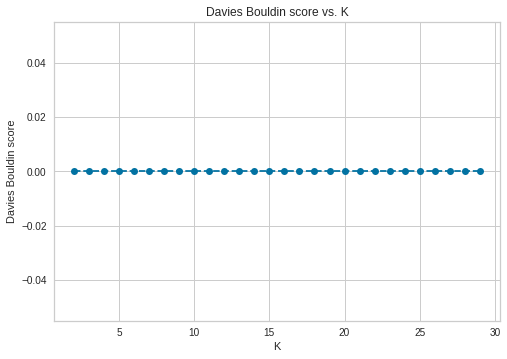

In [ ]:
# Davies Bouldin score for Kmeans
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    #instantiate kmeans
    km = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = km.fit_predict(labels)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(labels, model)
    return score
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(labels, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

Davies Bouldin score est égale à 0 pour K-means, il est excellent.

Rappel: Davies Bouldin score varie entre 0 et +infini, il est meilleur en 0.